# Models

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functools import reduce
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [2]:
# load pre porcessed data
df = pd.read_csv('../prepross_data/data.csv')


#### Filterout the paper described patient set

In [3]:
# filter dataset as describe in paper
def get_filter_by_age_diabDur(df, age, diabDur):
    filter_patients = df[(df["AgeAtConsent"] >= age) & (df["diagDuration"] > diabDur)] 
#     filter_patients=filter_patients.drop_duplicates(subset="PtID",keep="first") 
    print(f'Number of patients whos age is {age}+ and diabetics duration greater than {diabDur}  is -> {filter_patients.PtID.size}')
    return filter_patients

df = get_filter_by_age_diabDur(df, 26, 2)

Number of patients whos age is 26+ and diabetics duration greater than 2  is -> 7155


### for SH events prediction pre processing


In [4]:
y_label = 'Pt_SevHypoEver' 
# possible labels Pt_SevHypoEver, SHSeizComaPast12mos, DKAPast12mos, Depression, DiabNeuro, DKADiag

In [5]:
df[y_label].unique()

array([ 1.,  0., nan,  2.])

In [6]:
# get possible values in column including nan
def get_possible_vals_with_nan(df, colName):
    list_val =df[colName].unique().tolist()
    return list_val


# {'1.Yes': 0, '2.No': 1, "3.Don't know": 2}

get_possible_vals_with_nan(df, y_label)

if(y_label == 'SHSeizComaPast12mos' ):
#     df.drop(['NumSHSeizComaPast12mos','Pt_v3NumSHSeizComa','NumSHSeizComa', 'Pt_SevHypoEver'], inplace=True, axis=1) # add SHSeizComaPast12mos
    df.drop(['NumSHSeizComaPast12mos','Pt_v3NumSHSeizComa','NumSHSeizComa'], inplace=True, axis=1) # add SHSeizComaPast12mos
    df[y_label] = df[y_label].replace({2.0: 1.0})

elif (y_label == 'DKADiag'):  # DKADiag {'1.Yes': 0, '2.Probably Yes': 1, '3.No': 2, '4.Unknown': 3}
    df.drop(['Pt_NumHospDKA','Pt_HospDKASinceDiag','NumDKAOccur', 'DKAPast12mos'], inplace=True, axis=1)
    df[y_label] = df[y_label].replace({1.0: 0, 2: 1, 3: 1 })
    
elif (y_label == 'Pt_SevHypoEver'):
#     df.drop(['NumSHSeizComaPast12mos','Pt_v3NumSHSeizComa','NumSHSeizComa', 'SHSeizComaPast12mos'], inplace=True, axis=1) # add SHSeizComaPast12mos
    df[y_label] = df[y_label].replace({2.0: 1.0})

elif (y_label == 'DKAPast12mos'):
    df.drop(['Pt_NumHospDKA','Pt_HospDKASinceDiag','NumDKAOccur', 'DKADiag'], inplace=True, axis=1)
    df[y_label] = df[y_label].replace({2.0: 1.0})

# f_df = df[df['Pt_SevHypoEver'] == 0.0]
# f_df.PtID.size

# f2_df = df[df['Pt_SevHypoEver'] == 1.0]
# f2_df.PtID.size

In [7]:
# df.columns.to_numpy()

df[y_label].isna().sum()

2080

In [8]:
pd.options.display.max_rows = 100

def get_missing_val_percentage(df):
    return (df.isnull().sum()* 100 / len(df))


missing_per = get_missing_val_percentage(df)

# get missing values < threshold feature name list
variables = df.columns
thresh = 40
variable = [ ]
var = []
for i in range(df.columns.shape[0]):
    if missing_per[i]<= thresh: #setting the threshold as 40%
        variable.append(variables[i])
    else :
        var.append(variables[i])
        
print("variables missing vals < threshold")     
print(variable)
print("Length: ", len(variable))

print()
print("variables missing vals > threshold")     
print(var)
print("Length: ", len(var))

variables missing vals < threshold
['PtID', 'Pt_InitTrt', 'Pt_SevHypoEver', 'Pt_HospDKASinceDiag', 'Pt_NumHospDKA', 'Pt_InsulinRecMethod', 'Pt_MealBolusMethod', 'Pt_InsCarbRat', 'Pt_InsCarbRatBrkfst', 'Pt_InsCarbRatLunch', 'Pt_InsCarbRatDinn', 'Pt_BolusDaySnackFreq', 'Pt_BedtimeSnack', 'Pt_ChkBldSugPriBolus', 'Pt_MissInsDoseFreq', 'Pt_NumBolusDayUnk', 'Pt_InjLongActDayNotUsed', 'Pt_InjShortActDayNotUsed', 'Pt_LongActInsDayNotUsed', 'Pt_NumMeterCheckDay', 'Pt_DLoadHGMFreq', 'Pt_LogBook', 'Pt_ChkKetones', 'Pt_CGMUse', 'Pt_CGMStopUse', 'Pt_LastEyeExamPart', 'Pt_DiabRetTrtPart', 'Pt_LegBlind', 'Pt_GlutFreeDiet', 'Pt_CeliacDr', 'Pt_HighBldPrTrt', 'Pt_Smoke', 'Pt_GenHealth', 'Pt_StressDiab', 'Pt_EduLevel', 'Pt_AnnualInc', 'Pt_HouseholdCnt', 'Pt_InsPriv', 'Pt_MaritalStatus', 'Pt_EmployStatus', 'Pt_RaceEth', 'ReqInsulinCrit', 'DKADiag', 'OralAgnTrt', 'ExamDaysFromConsent', 'Gender', 'Weight', 'Height', 'BldPrSys', 'BldPrDia', 'InsulinDeliv', 'Lypohyper', 'Lipoatrophy', 'AcanNigrDiag', 'PulseRa

In [9]:
# cols_to_del = ['Diab_dur_greater','HbA1C_SH', 'Pt_InsHumalog', 'Pt_InsNovolog', 'Pt_BolusDecCntCarb', 
#                'Pt_BolusBedtimeSnackFreq', 'Pt_InsPumpStartAge', 'Pt_PumpManuf', 'Pt_PumpModel',
#                'Pt_DaysLeavePumpIns', 'Pt_BasInsRateChgDay', 'Pt_NumBolusDay', 'Pt_ReturnPump', 
#                'Pt_InjMethod', 'Pt_InjLongActDay', 'Pt_InjShortActDay', 'Pt_LongActInsDay', 
#                'Pt_ShortActInsDay', 'Pt_PumpStopUse', 'Pt_HealthProfDiabEdu', 'Pt_SmokeAmt', 
#                'Pt_DaysWkEx', 'Pt_MenarcheAge', 'Pt_RegMenstCyc', 'Pt_IrregMenstCycReas',
#                'Pt_CurrPreg', 'Pt_MiscarriageNum', 'Pt_EduLevelMother', 'Pt_EduLevelFather', 
#                'HyperglyCritRandGluc', 'WeightDiag', 'NumDKAOccur', 'TannerNotDone', 'PumpTotBasIns',
#                'HGMNumDays', 'HGMTestCntAvg', 'HGMGlucMean', 'CGMGlucPctBelow70', 'CGMGlucPctBelow60', 
#                'PulseRate', 'InsCarbRatBrkfst', 'InsCarbRatLunch', 'InsCarbRatDinn', 'InsCarbRatDinnNotUsed', 
#                'CGMPctBelow55', 'CGMPctBelow80']

# df.drop(cols_to_del, inplace=True, axis=1)
# df.head(10)

# Divide Dataset

In [10]:
# filter only the features used in paper diagDuration,

selected_features = False

# if(selected_features):
#     df = df[['AgeAtConsent','diagDuration','HbA1c', 'Gender', 'Pt_RaceEth','Pt_AnnualInc', 'Pt_InsPriv', 'Pt_EduLevel',
#          'InsulinDeliv','Pt_InsCarbRat', 'relative_T1D', 'Pt_Smoke', y_label,
#          'MajorLifeStressEvent', 'Weight', 'Height']] # Pt_SevHypoEver ,SHSeizComaPast12mos, DKAPast12mos

if(selected_features):
    df = df[['diagDuration','HbA1c','Pt_AnnualInc', 'Pt_InsPriv', 'Pt_EduLevel',
         'InsulinDeliv','Pt_InsCarbRat', 'Pt_Smoke', y_label,
         'MajorLifeStressEvent']] # Pt_SevHypoEver ,SHSeizComaPast12mos, DKAPast12mos


# if(selected_features):
#     df = df[['Diab_dur_greater','HbA1C_SH','Pt_AnnualInc', 'Pt_InsPriv', 'Pt_EduLevel','diagDuration'
#              ,y_label]] # SHSeizComaPast12mos

# df = df[['Pt_HospDKASinceDiag', 'Pt_ChkBldSugPriBolus', 'Pt_NumMeterCheckDay',
#        'Pt_ChkKetones', 'Pt_HighBldPrTrt', 'Pt_DaysWkEx', 'Pt_EduLevelFather',
#        'Pt_EmployStatus', 'InsulinDeliv', 'Lypohyper', 'Lipoatrophy',
#        'AcanNigrDiag', 'AcanNigrPres', 'ACEARB', 'InsNPH', 'InsPremix5050',
#        'AgeAtConsent', 'Pt_v3NumHospOthReas', 'DiabNeuro', 'diagDuration']]

In [11]:
if(not selected_features):
    df=df.drop('PtID', axis = 1)

In [12]:
# df = df.dropna()
# df

In [13]:

def divide_data(df,label):
    Y = df[label]
    X = df.drop(label, axis=1)
    return X, Y


X, Y = divide_data(df, y_label)


# Feature Selection

In [14]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif, SelectPercentile
from sklearn.metrics import confusion_matrix, classification_report, f1_score, auc, roc_curve, roc_auc_score, precision_score, recall_score, balanced_accuracy_score
from numpy.random import seed
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
seed(42)
import tensorflow as tf
tf.random.set_seed(38)
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Dense

2021-12-14 13:47:21.270320: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-14 13:47:21.270344: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [15]:
shape = np.shape(X) 

if(selected_features):
    feature = shape[1] 
else:
    feature = 20 # shape[1] 
    
n_classes = 2

feature

20

In [16]:

# fill with 0 - if data not available probably patient has not that medical condition
if(y_label == 'SHSeizComaPast12mos' or y_label == 'DKADiag' or y_label == 'Pt_SevHypoEver' or y_label == 'DKAPast12mos'):
    Y = Y.fillna(1)
else:
    Y = Y.fillna(0)


In [17]:
X.isna().sum()

Pt_InitTrt              199
Pt_HospDKASinceDiag     205
Pt_NumHospDKA           219
Pt_InsulinRecMethod       1
Pt_InsHumalog          3561
                       ... 
Anxiety                   0
Psychosis                 0
DiabNeuro                 0
diagDuration              0
Diab_dur_greater          0
Length: 155, dtype: int64

In [18]:

seed(42)
tf.random.set_seed(38)
# Save original data set
original_X = X

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=123)
# if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)


In [19]:
len(Y_train == 0.0)
unique, counts = numpy.unique(Y_train.to_numpy(), return_counts=True)
print(unique, counts)


unique_test, counts_test = numpy.unique(Y_test.to_numpy(), return_counts=True)
print(unique_test, counts_test)


[0. 1.] [1471 3895]
[0. 1.] [ 491 1298]


# Imputations

In [20]:
# fill nan values in categorical dataset with frequent value

# tested wuth mean and median - results is lower than most_frequent
imputeX = SimpleImputer(missing_values=np.nan, strategy = "most_frequent")
# imputeX = KNNImputer(missing_values=np.nan, n_neighbors = 3, weights='distance')
# imputeX = IterativeImputer(max_iter=5, random_state=0)

X_train = imputeX.fit_transform(X_train)


In [21]:
# test data imputation

Test = X_test.copy()
Test.loc[:,y_label] = Y_test

X_test = imputeX.transform(X_test)


# Scale data

In [22]:
# Normalize numeric features
scaler = StandardScaler()
# scaler = MinMaxScaler()
select = {}
select[0] = pd.DataFrame(scaler.fit_transform(X_train))
select[1] = Y_train
select[2] = pd.DataFrame(scaler.transform(X_test))


## Feature Selection

In [23]:
# TODO

# def select_features(select, feature):
#     selected = {}
#     fs = SelectKBest(score_func=mutual_info_classif, k=feature) # k=feature score_func SelectPercentile
#     selected[0] = fs.fit_transform(select[0], select[1])
#     selected[1] = fs.transform(select[2])
        
#     idx = fs.get_support(indices=True)
    
#     return selected, fs, idx



In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#Selecting the Best important features according to Logistic Regression
# Give better performance than selectKBest 
def select_features(select, feature):
    selected = {}
    fs = RFE(estimator=LogisticRegression(), n_features_to_select=feature, step = 1) #  step (the number of features eliminated each iteration) 
    selected[0] = fs.fit_transform(select[0], select[1])
    selected[1] = fs.transform(select[2])
        
    idx = fs.get_support(indices=True)
    
    return selected, fs, idx


In [25]:
# Feature selection
selected, fs, idx = select_features(select, feature)


In [26]:
# Get columns to keep and create new dataframe with those only
from pprint import pprint
cols = fs.get_support(indices=True)
features_df_new = original_X.iloc[:,cols]
pprint(features_df_new.columns)
print(features_df_new.shape)

Index(['Pt_HospDKASinceDiag', 'Pt_ChkBldSugPriBolus', 'Pt_NumMeterCheckDay',
       'Pt_ChkKetones', 'Pt_HighBldPrTrt', 'Pt_DaysWkEx', 'Pt_EduLevelFather',
       'Pt_EmployStatus', 'InsulinDeliv', 'Lypohyper', 'Lipoatrophy',
       'AcanNigrDiag', 'AcanNigrPres', 'ACEARB', 'InsNPH', 'InsPremix5050',
       'AgeAtConsent', 'Pt_v3NumHospOthReas', 'DiabNeuro', 'diagDuration'],
      dtype='object')
(7155, 20)


In [27]:
X_train = pd.DataFrame(selected[0], columns = features_df_new.columns)
X_test = pd.DataFrame(selected[1], columns = features_df_new.columns)

81.10676355505869
              precision    recall  f1-score   support

         0.0       0.76      0.46      0.57       491
         1.0       0.82      0.94      0.88      1298

    accuracy                           0.81      1789
   macro avg       0.79      0.70      0.72      1789
weighted avg       0.80      0.81      0.79      1789



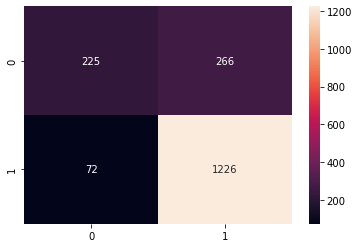

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
model = AdaBoostClassifier(random_state=0, learning_rate=0.05, n_estimators=1000, algorithm = "SAMME.R") #algorithm{‘SAMME’, ‘SAMME.R’}, default=’SAMME.R’
model.fit(X_train, Y_train)

pred=model.predict(X_test)
print(accuracy_score(Y_test, pred)*100)

confusion_matrix_xgb = pd.DataFrame(confusion_matrix(Y_test, pred))
sns.heatmap(confusion_matrix_xgb, annot=True,fmt='g')
print(classification_report(Y_test, pred))

<AxesSubplot:>

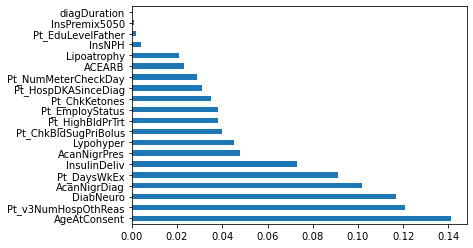

In [29]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns[0:feature])
feat_importances.nlargest(feature).plot(kind='barh')

# Model - XGB

79.93292342090554
              precision    recall  f1-score   support

         0.0       0.67      0.52      0.59       491
         1.0       0.83      0.91      0.87      1298

    accuracy                           0.80      1789
   macro avg       0.75      0.71      0.73      1789
weighted avg       0.79      0.80      0.79      1789



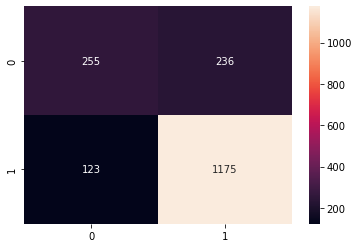

In [30]:
# xgboost - train with missing values
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model=XGBClassifier(use_label_encoder=False, eta = 0.1,#eta between(0.01-0.2)
        max_depth = 20, #values between(3-10)
        max_delta_step = 10,
        subsample = 0.9,#values between(0.5-1)
        colsample_bytree = 1,#values between(0.5-1)
        tree_method = "auto",
        process_type = "default",
        num_parallel_tree=7,
        objective='multi:softmax',
        min_child_weight = 3,
        booster='gbtree',
        eval_metric = "mlogloss",
        num_class = n_classes)
model.fit(X_train,Y_train)



xgb_pred=model.predict(X_test)
print(accuracy_score(Y_test, xgb_pred)*100)

confusion_matrix_xgb = pd.DataFrame(confusion_matrix(Y_test, xgb_pred))
sns.heatmap(confusion_matrix_xgb, annot=True, fmt='g')
print(classification_report(Y_test, xgb_pred))

<AxesSubplot:>

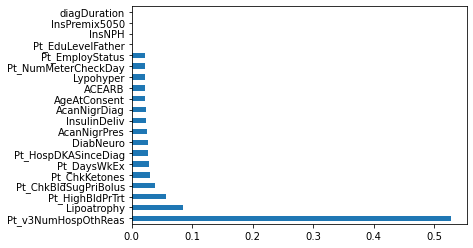

In [31]:
# feature importance graph of XGB
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns[0:feature])
feat_importances.nlargest(20).plot(kind='barh')

## Model 2 - Random forest

81.05086640581331
              precision    recall  f1-score   support

         0.0       0.70      0.53      0.61       491
         1.0       0.84      0.92      0.88      1298

    accuracy                           0.81      1789
   macro avg       0.77      0.72      0.74      1789
weighted avg       0.80      0.81      0.80      1789

Accuracy of random forest classifier on training set: 1.00
Accuracy of random forest classifier classifier on test set: 0.81


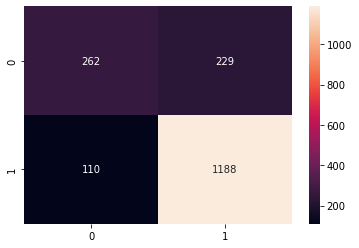

In [32]:
#  random forest classifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


model=RandomForestClassifier(max_depth=100,
                             n_estimators = 20,
                             criterion = 'entropy', # {“gini”, “entropy”}, default=”gini”
                             class_weight = 'balanced', # {“balanced”, “balanced_subsample”}, dict or list of dicts, default=None
                             ccp_alpha=0.0001,
                             random_state=0)


model.fit(X_train,Y_train)

pred=model.predict(X_test)
print(accuracy_score(Y_test, pred)*100)

confusion_matrix_rf = pd.DataFrame(confusion_matrix(Y_test, pred))
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g')
print(classification_report(Y_test, pred))

print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(model.score(X_train, Y_train)))
print('Accuracy of random forest classifier classifier on test set: {:.2f}'
     .format(model.score(X_test, Y_test)))

<AxesSubplot:>

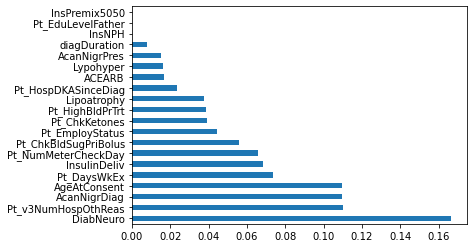

In [33]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns[0:feature])
feat_importances.nlargest(20).plot(kind='barh')

## Model 3 LogisticRegression

/home/kali/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "


75.40525433202907
              precision    recall  f1-score   support

         0.0       0.54      0.73      0.62       491
         1.0       0.88      0.76      0.82      1298

    accuracy                           0.75      1789
   macro avg       0.71      0.75      0.72      1789
weighted avg       0.79      0.75      0.76      1789

Accuracy of logistic regression on training set: 0.75
Accuracy of logistic regression on test set: 0.75


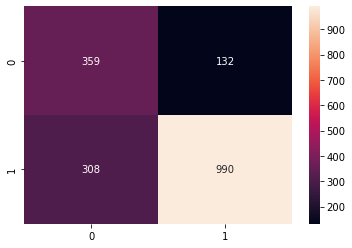

In [34]:
from sklearn.linear_model import LogisticRegression

#penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
logreg = LogisticRegression(
    penalty='l2',
    tol = 5e-4,
    C=1,
    l1_ratio = 10,
    class_weight='balanced',  # balanced
    random_state=0,
    solver = 'saga' # saga, sag
)

logreg.fit(X_train, Y_train)


pred=logreg.predict(X_test)
print(accuracy_score(Y_test, pred)*100)

confusion_matrix_lr = pd.DataFrame(confusion_matrix(Y_test, pred))
sns.heatmap(confusion_matrix_lr, annot=True, fmt='g')
print(classification_report(Y_test, pred))


print('Accuracy of logistic regression on training set: {:.2f}'
     .format(logreg.score(X_train, Y_train)))
print('Accuracy of logistic regression on test set: {:.2f}'
     .format(logreg.score(X_test, Y_test)))



<AxesSubplot:>

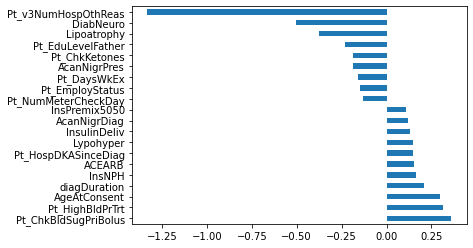

In [35]:

feat_importances = pd.Series(logreg.coef_[0], index=X_train.columns[0:feature])
feat_importances.nlargest(20).plot(kind='barh')

## Model 4 - Decision tree

74.51089994410285
              precision    recall  f1-score   support

         0.0       0.54      0.53      0.53       491
         1.0       0.82      0.83      0.82      1298

    accuracy                           0.75      1789
   macro avg       0.68      0.68      0.68      1789
weighted avg       0.74      0.75      0.74      1789

Accuracy of DT on training set: 1.00
Accuracy of DT on test set: 0.75


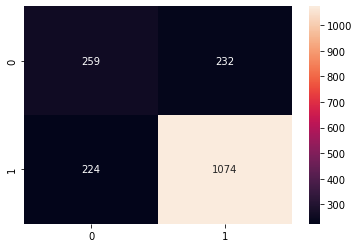

In [36]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(
                        random_state=0,
                        criterion='gini',
                        splitter = 'best',
                        max_depth = 100,
                        max_features = 20).fit(X_train, Y_train)


pred=clf.predict(X_test)
print(accuracy_score(Y_test, pred)*100)

confusion_matrix_dt = pd.DataFrame(confusion_matrix(Y_test, pred))
sns.heatmap(confusion_matrix_dt, annot=True, fmt='g')
print(classification_report(Y_test, pred))

print('Accuracy of DT on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of DT on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))



<AxesSubplot:>

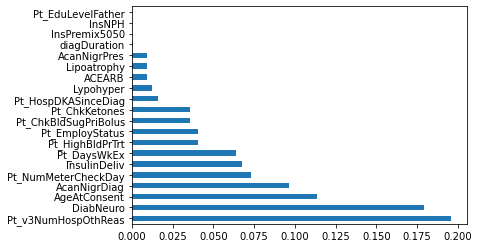

In [37]:

feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns[0:feature])
feat_importances.nlargest(20).plot(kind='barh')

## Model 5 - K-Nearest Neighbors

73.22526551145891
              precision    recall  f1-score   support

         0.0       0.51      0.46      0.49       491
         1.0       0.80      0.84      0.82      1298

    accuracy                           0.73      1789
   macro avg       0.66      0.65      0.65      1789
weighted avg       0.72      0.73      0.73      1789

Accuracy of KNN on training set: 1.00
Accuracy of KNN on test set: 0.73


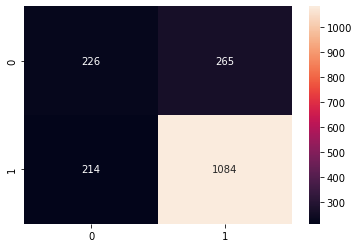

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(
    n_neighbors =1,
    weights = "uniform", # uniform, distance
    algorithm =  'brute', # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
)
knn.fit(X_train, Y_train)


pred=knn.predict(X_test)
print(accuracy_score(Y_test, pred)*100)

confusion_matrix_knn = pd.DataFrame(confusion_matrix(Y_test, pred))
sns.heatmap(confusion_matrix_knn, annot=True, fmt='g')
print(classification_report(Y_test, pred))

print('Accuracy of KNN on training set: {:.2f}'
     .format(knn.score(X_train, Y_train)))
print('Accuracy of KNN on test set: {:.2f}'
     .format(knn.score(X_test, Y_test)))

## Model 6 - Linear Discriminant Analysis

78.42370039128005
              precision    recall  f1-score   support

         0.0       0.69      0.39      0.50       491
         1.0       0.80      0.93      0.86      1298

    accuracy                           0.78      1789
   macro avg       0.74      0.66      0.68      1789
weighted avg       0.77      0.78      0.76      1789

Accuracy of LDA on training set: 0.79
Accuracy of LDA on test set: 0.78


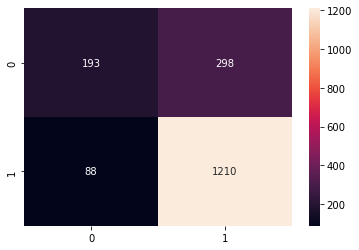

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(
    solver = 'eigen', # solver{‘svd’, ‘lsqr’, ‘eigen’}, default=’svd’
    shrinkage= 'auto', #shrinkage‘auto’ or float, default=None
    n_components = 1,
    tol = 1e-3                       
)
lda.fit(X_train, Y_train)


pred=lda.predict(X_test)
print(accuracy_score(Y_test, pred)*100)

confusion_matrix_lda = pd.DataFrame(confusion_matrix(Y_test, pred))
sns.heatmap(confusion_matrix_lda, annot=True, fmt='g')
print(classification_report(Y_test, pred))

print('Accuracy of LDA on training set: {:.2f}'
     .format(lda.score(X_train, Y_train)))
print('Accuracy of LDA on test set: {:.2f}'
     .format(lda.score(X_test, Y_test)))

## Model 7- Gaussian Naive Bayes

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=1.0)
78.98267188373393
              precision    recall  f1-score   support

         0.0       0.65      0.50      0.57       491
         1.0       0.83      0.90      0.86      1298

    accuracy                           0.79      1789
   macro avg       0.74      0.70      0.71      1789
weighted avg       0.78      0.79      0.78      1789

Accuracy of gaussian naive bayes on training set: 0.77
Accuracy of gaussian naive bayes on test set: 0.79


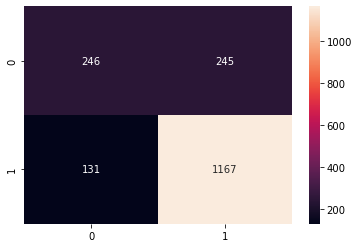

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

gnb = GaussianNB()

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbModel_grid = GridSearchCV(estimator=gnb, param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, Y_train)

# best parameters
print(nbModel_grid.best_estimator_)

gnb = GaussianNB(priors=None, var_smoothing=1.0)
gnb.fit(X_train, Y_train)
      
pred=gnb.predict(X_test)
print(accuracy_score(Y_test, pred)*100)

confusion_matrix_gnb = pd.DataFrame(confusion_matrix(Y_test, pred))
sns.heatmap(confusion_matrix_gnb, annot=True, fmt='g')
print(classification_report(Y_test, pred))

print('Accuracy of gaussian naive bayes on training set: {:.2f}'
     .format(gnb.score(X_train, Y_train)))
print('Accuracy of gaussian naive bayes on test set: {:.2f}'
     .format(gnb.score(X_test, Y_test)))

## Model 8 - SVM

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5] END C=0.1, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.723 total time=   0.0s
[CV 2/5] END C=0.1, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.723 total time=   0.0s
[CV 3/5] END C=0.1, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.726 total time=   0.0s
[CV 4/5] END C=0.1, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.721 total time=   0.0s
[CV 5/5] END C=0.1, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.725 total time=   0.0s
[CV 1/5] END C=0.1, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.722 total time=   0.0s
[CV 2/5] END C=0.1, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.724 total time=   0.0s
[CV 3/5] END C=0.1, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.282 total time=   0.0s
[CV 4/5] END C=0.1, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.728 total time=   0.0s
[CV 5/5] END C=0.1, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=0.1, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.727 total time=   0.0s
[CV 1/5] END C=0.1, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.399 total time=   0.0s
[CV 2/5] END C=0.1, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.442 total time=   0.0s
[CV 3/5] END C=0.1, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.466 total time=   0.0s
[CV 4/5] END C=0.1, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.560 total time=   0.0s
[CV 5/5] END C=0.1, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.401 total time=   0.0s
[CV 1/5] END C=0.1, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.496 total time=   0.0s
[CV 2/5] END C=0.1, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.377 total time=   0.0s
[CV 3/5] END C=0.1, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.727 total time=   0.0s
[CV 4/5] END C=0.1, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.707 total time=   0.0s
[CV 5/5] END C=0.1, de

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=0.1, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.470 total time=   0.0s
[CV 1/5] END C=0.1, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.704 total time=   0.0s
[CV 2/5] END C=0.1, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.708 total time=   0.0s
[CV 3/5] END C=0.1, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.706 total time=   0.0s
[CV 4/5] END C=0.1, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.678 total time=   0.0s
[CV 5/5] END C=0.1, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.739 total time=   0.0s
[CV 1/5] END C=0.1, degree=0, gamma=0.01, kernel=rbf, max_iter=15;, score=0.712 total time=   0.0s
[CV 2/5] END C=0.1, degree=0, gamma=0.01, kernel=rbf, max_iter=15;, score=0.727 total time=   0.0s
[CV 3/5] END C=0.1, degree=0, gamma=0.01, kernel=rbf, max_iter=15;, score=0.734 total time=   0.0s
[CV 4/5] END C=0.1, degree=0, gamma=0.01, kernel=rbf, max_iter=15;, score=0.682 total time=   0.0s
[CV 5/5] EN

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=0.1, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.680 total time=   0.0s
[CV 5/5] END C=0.1, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.748 total time=   0.0s
[CV 1/5] END C=0.1, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.723 total time=   0.0s
[CV 2/5] END C=0.1, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.722 total time=   0.0s
[CV 3/5] END C=0.1, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.733 total time=   0.0s
[CV 4/5] END C=0.1, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.724 total time=   0.0s
[CV 5/5] END C=0.1, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.1, degree=0, gamma=0.001, kernel=rbf, max_iter=15;, score=0.725 total time=   0.0s
[CV 2/5] END C=0.1, degree=0, gamma=0.001, kernel=rbf, max_iter=15;, score=0.723 total time=   0.0s
[CV 3/5] END C=0.1, degree=0, gamma=0.001, kernel=rbf, max_iter=15;, score=0.733 total time=   0.0s
[C

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=0.1, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.723 total time=   0.0s
[CV 2/5] END C=0.1, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.716 total time=   0.0s
[CV 3/5] END C=0.1, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.734 total time=   0.0s
[CV 4/5] END C=0.1, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.722 total time=   0.0s
[CV 5/5] END C=0.1, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.733 total time=   0.0s
[CV 1/5] END C=0.1, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.743 total time=   0.0s
[CV 2/5] END C=0.1, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.748 total time=   0.0s
[CV 3/5] END C=0.1, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.733 total time=   0.0s
[CV 4/5] END C=0.1, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.695 total time=   0.0s
[CV 5/5] END C=0.1, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.729 total tim

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=0.1, degree=1, gamma=1, kernel=rbf, max_iter=10;, score=0.721 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=1, kernel=rbf, max_iter=10;, score=0.725 total time=   0.0s
[CV 1/5] END C=0.1, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.722 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.724 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.282 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.728 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.729 total time=   0.0s
[CV 1/5] END C=0.1, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.723 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.724 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.727 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=1, k

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=0.1, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.496 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.377 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.727 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.707 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.478 total time=   0.0s
[CV 1/5] END C=0.1, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.509 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.385 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.571 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.508 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.470 total time=   0.0s
[CV 1/5] END C=0.1, 

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=0.1, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.682 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.721 total time=   0.0s
[CV 1/5] END C=0.1, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.730 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.760 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.734 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.680 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.748 total time=   0.0s
[CV 1/5] END C=0.1, degree=1, gamma=0.001, kernel=rbf, max_iter=10;, score=0.723 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, gamma=0.001, kernel=rbf, max_iter=10;, score=0.722 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=0.001, kernel=rbf, max_iter=10;, score=0.733 total time=   0.0s
[CV 4/5

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=0.1, degree=1, gamma=0.001, kernel=rbf, max_iter=20;, score=0.724 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, gamma=0.001, kernel=rbf, max_iter=20;, score=0.723 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=0.001, kernel=rbf, max_iter=20;, score=0.726 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=0.001, kernel=rbf, max_iter=20;, score=0.725 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=0.001, kernel=rbf, max_iter=20;, score=0.724 total time=   0.0s
[CV 1/5] END C=0.1, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.723 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.716 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.734 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.722 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.733 total time=   

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=0.1, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.751 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.739 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.723 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.723 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.726 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.721 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.725 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=1, kernel=rbf, max_iter=15;, score=0.722 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=1, kernel=rbf, max_iter=15;, score=0.724 total time=   0.0s
[CV 3/5] END C=0.1, degre

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=0.1, degree=2, gamma=1, kernel=rbf, max_iter=20;, score=0.727 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.399 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.442 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.466 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.560 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.401 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.496 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.377 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.727 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.707 total time=   0.0s
[CV 5/5] END C=0.1, de

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=0.1, degree=2, gamma=0.01, kernel=rbf, max_iter=10;, score=0.706 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=0.01, kernel=rbf, max_iter=10;, score=0.678 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=0.01, kernel=rbf, max_iter=10;, score=0.739 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.712 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.727 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.734 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.682 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.721 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.730 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.760 total time=   0.0s
[CV 3/5] E

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=0.1, degree=2, gamma=0.001, kernel=rbf, max_iter=15;, score=0.725 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=0.001, kernel=rbf, max_iter=15;, score=0.723 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=0.001, kernel=rbf, max_iter=15;, score=0.733 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=0.001, kernel=rbf, max_iter=15;, score=0.723 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=0.001, kernel=rbf, max_iter=15;, score=0.728 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.724 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.723 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.726 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.725 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.724 total time=   0.0s


/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=0.1, degree=2, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.695 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.729 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.747 total time=   0.0s


/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=0.1, degree=2, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.748 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.751 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.739 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.723 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.723 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.726 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.721 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.725 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamma=1, kernel=rbf, max_iter=15;, score=0.722 total time=   0.0s
[CV 2/5] END C=0.1, 

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=0.1, degree=3, gamma=1, kernel=rbf, max_iter=20;, score=0.730 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, gamma=1, kernel=rbf, max_iter=20;, score=0.727 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.399 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.442 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.466 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.560 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.401 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.496 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.377 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.727 total time=   0.0s
[CV 4/5] END C=0.1, degr

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=0.1, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.704 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.708 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.706 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.678 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.739 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.712 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.727 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.734 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.682 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.721 total time=   0.0s
[CV 1/5] E

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=0.1, degree=3, gamma=0.001, kernel=rbf, max_iter=10;, score=0.724 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, gamma=0.001, kernel=rbf, max_iter=10;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamma=0.001, kernel=rbf, max_iter=15;, score=0.725 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, gamma=0.001, kernel=rbf, max_iter=15;, score=0.723 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=0.001, kernel=rbf, max_iter=15;, score=0.733 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, gamma=0.001, kernel=rbf, max_iter=15;, score=0.723 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, gamma=0.001, kernel=rbf, max_iter=15;, score=0.728 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.724 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.723 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.726 total time=   0.0s


/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=0.1, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.748 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.733 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.695 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.729 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.747 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.748 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.751 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.739 total time=   0.0s
[CV 1/5] END C=1, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.291 total time=   0.

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=1, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.721 total time=   0.0s
[CV 3/5] END C=1, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.727 total time=   0.0s
[CV 4/5] END C=1, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.725 total time=   0.0s
[CV 5/5] END C=1, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.277 total time=   0.0s
[CV 1/5] END C=1, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.722 total time=   0.0s
[CV 2/5] END C=1, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.719 total time=   0.0s
[CV 3/5] END C=1, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.283 total time=   0.0s
[CV 4/5] END C=1, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.728 total time=   0.0s
[CV 5/5] END C=1, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.279 total time=   0.0s
[CV 1/5] END C=1, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.308 total time=   0.0s
[CV 2/5] END C=1, degree=0, gamma=0.1, kernel=rbf, max_ite

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=1, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.302 total time=   0.0s
[CV 2/5] END C=1, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.399 total time=   0.0s
[CV 3/5] END C=1, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.571 total time=   0.0s
[CV 4/5] END C=1, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.602 total time=   0.0s
[CV 5/5] END C=1, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.526 total time=   0.0s
[CV 1/5] END C=1, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.704 total time=   0.0s
[CV 2/5] END C=1, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.733 total time=   0.0s
[CV 3/5] END C=1, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.651 total time=   0.0s
[CV 4/5] END C=1, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.706 total time=   0.0s
[CV 5/5] END C=1, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.746 total time=   0.0s
[CV 1/5] END C=1, degree=0, gamma=0

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=1, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.734 total time=   0.0s
[CV 4/5] END C=1, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.722 total time=   0.0s
[CV 5/5] END C=1, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.733 total time=   0.0s
[CV 1/5] END C=1, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.743 total time=   0.0s
[CV 2/5] END C=1, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.748 total time=   0.0s
[CV 3/5] END C=1, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.733 total time=   0.0s
[CV 4/5] END C=1, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.695 total time=   0.0s
[CV 5/5] END C=1, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.729 total time=   0.0s
[CV 1/5] END C=1, degree=0, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.747 total time=   0.0s
[CV 2/5] END C=1, degree=0, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.748 total time=   0.0s
[CV 3/5] E

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=1, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.721 total time=   0.0s
[CV 3/5] END C=1, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.727 total time=   0.0s
[CV 4/5] END C=1, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.725 total time=   0.0s
[CV 5/5] END C=1, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.277 total time=   0.0s
[CV 1/5] END C=1, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.722 total time=   0.0s
[CV 2/5] END C=1, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.719 total time=   0.0s
[CV 3/5] END C=1, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.283 total time=   0.0s
[CV 4/5] END C=1, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.728 total time=   0.0s
[CV 5/5] END C=1, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.279 total time=   0.0s
[CV 1/5] END C=1, degree=1, gamma=0.1, kernel=rbf, max_iter=10;, score=0.308 total time=   0.0s
[CV 2/5] END C=1, degree=1, gamma=0.1, kernel=rbf, max_ite

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=1, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.462 total time=   0.0s
[CV 1/5] END C=1, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.302 total time=   0.0s
[CV 2/5] END C=1, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.399 total time=   0.0s
[CV 3/5] END C=1, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.571 total time=   0.0s
[CV 4/5] END C=1, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.602 total time=   0.0s
[CV 5/5] END C=1, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.526 total time=   0.0s
[CV 1/5] END C=1, degree=1, gamma=0.01, kernel=rbf, max_iter=10;, score=0.704 total time=   0.0s
[CV 2/5] END C=1, degree=1, gamma=0.01, kernel=rbf, max_iter=10;, score=0.733 total time=   0.0s
[CV 3/5] END C=1, degree=1, gamma=0.01, kernel=rbf, max_iter=10;, score=0.651 total time=   0.0s
[CV 4/5] END C=1, degree=1, gamma=0.01, kernel=rbf, max_iter=10;, score=0.706 total time=   0.0s
[CV 5/5] END C=1, degree=1, gamma=0.

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=1, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.655 total time=   0.0s
[CV 4/5] END C=1, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.725 total time=   0.0s
[CV 5/5] END C=1, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.728 total time=   0.0s
[CV 1/5] END C=1, degree=1, gamma=0.001, kernel=rbf, max_iter=10;, score=0.723 total time=   0.0s
[CV 2/5] END C=1, degree=1, gamma=0.001, kernel=rbf, max_iter=10;, score=0.722 total time=   0.0s
[CV 3/5] END C=1, degree=1, gamma=0.001, kernel=rbf, max_iter=10;, score=0.726 total time=   0.0s
[CV 4/5] END C=1, degree=1, gamma=0.001, kernel=rbf, max_iter=10;, score=0.719 total time=   0.0s
[CV 5/5] END C=1, degree=1, gamma=0.001, kernel=rbf, max_iter=10;, score=0.730 total time=   0.0s
[CV 1/5] END C=1, degree=1, gamma=0.001, kernel=rbf, max_iter=15;, score=0.725 total time=   0.0s
[CV 2/5] END C=1, degree=1, gamma=0.001, kernel=rbf, max_iter=15;, score=0.723 total time=   0.0s
[CV 3/5] END C=1, degre

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=1, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.723 total time=   0.0s
[CV 2/5] END C=1, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.716 total time=   0.0s
[CV 3/5] END C=1, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.734 total time=   0.0s
[CV 4/5] END C=1, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.722 total time=   0.0s
[CV 5/5] END C=1, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.733 total time=   0.0s
[CV 1/5] END C=1, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.743 total time=   0.0s
[CV 2/5] END C=1, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.748 total time=   0.0s
[CV 3/5] END C=1, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.733 total time=   0.0s
[CV 4/5] END C=1, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.695 total time=   0.0s
[CV 5/5] END C=1, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.729 total time=   0.0s
[CV 1/5] E

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=1, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.310 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.727 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.285 total time=   0.0s
[CV 5/5] END C=1, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.462 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=0.1, kernel=rbf, max_iter=20;, score=0.302 total time=   0.0s
[CV 2/5] END C=1, degree=2, gamma=0.1, kernel=rbf, max_iter=20;, score=0.399 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=0.1, kernel=rbf, max_iter=20;, score=0.571 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=0.1, kernel=rbf, max_iter=20;, score=0.602 total time=   0.0s
[CV 5/5] END C=1, degree=2, gamma=0.1, kernel=rbf, max_iter=20;, score=0.526 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=0.01, kernel=rbf, max_iter=10;, score=0.704 total time=   0.0s
[CV 2/5] END C=1, degree=2, gamma=0.01,

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=1, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.730 total time=   0.0s
[CV 2/5] END C=1, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.732 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.655 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.725 total time=   0.0s
[CV 5/5] END C=1, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.728 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.723 total time=   0.0s
[CV 2/5] END C=1, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.722 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.726 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.719 total time=   0.0s
[CV 5/5] END C=1, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.730 total time=   0.0s
[CV 1/5] END C=1, degree=

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=1, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.724 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.723 total time=   0.0s
[CV 2/5] END C=1, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.716 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.734 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.722 total time=   0.0s
[CV 5/5] END C=1, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.733 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.743 total time=   0.0s
[CV 2/5] END C=1, degree=2, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.748 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.733 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.695 total time=   0.0s
[CV 5/5] EN

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=1, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.726 total time=   0.0s
[CV 5/5] END C=1, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.276 total time=   0.0s
[CV 1/5] END C=1, degree=3, gamma=1, kernel=rbf, max_iter=15;, score=0.722 total time=   0.0s
[CV 2/5] END C=1, degree=3, gamma=1, kernel=rbf, max_iter=15;, score=0.721 total time=   0.0s
[CV 3/5] END C=1, degree=3, gamma=1, kernel=rbf, max_iter=15;, score=0.727 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=1, kernel=rbf, max_iter=15;, score=0.725 total time=   0.0s
[CV 5/5] END C=1, degree=3, gamma=1, kernel=rbf, max_iter=15;, score=0.277 total time=   0.0s
[CV 1/5] END C=1, degree=3, gamma=1, kernel=rbf, max_iter=20;, score=0.722 total time=   0.0s
[CV 2/5] END C=1, degree=3, gamma=1, kernel=rbf, max_iter=20;, score=0.719 total time=   0.0s
[CV 3/5] END C=1, degree=3, gamma=1, kernel=rbf, max_iter=20;, score=0.283 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=1, kernel=rbf, max_iter=20

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=1, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.738 total time=   0.0s
[CV 1/5] END C=1, degree=3, gamma=0.01, kernel=rbf, max_iter=20;, score=0.730 total time=   0.0s
[CV 2/5] END C=1, degree=3, gamma=0.01, kernel=rbf, max_iter=20;, score=0.732 total time=   0.0s
[CV 3/5] END C=1, degree=3, gamma=0.01, kernel=rbf, max_iter=20;, score=0.655 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=0.01, kernel=rbf, max_iter=20;, score=0.725 total time=   0.0s
[CV 5/5] END C=1, degree=3, gamma=0.01, kernel=rbf, max_iter=20;, score=0.728 total time=   0.0s
[CV 1/5] END C=1, degree=3, gamma=0.001, kernel=rbf, max_iter=10;, score=0.723 total time=   0.0s
[CV 2/5] END C=1, degree=3, gamma=0.001, kernel=rbf, max_iter=10;, score=0.722 total time=   0.0s
[CV 3/5] END C=1, degree=3, gamma=0.001, kernel=rbf, max_iter=10;, score=0.726 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=0.001, kernel=rbf, max_iter=10;, score=0.719 total time=   0.0s
[CV 5/5] END C=1, degree=3

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=1, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.724 total time=   0.0s
[CV 2/5] END C=1, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.724 total time=   0.0s
[CV 3/5] END C=1, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.729 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.725 total time=   0.0s
[CV 5/5] END C=1, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.724 total time=   0.0s
[CV 1/5] END C=1, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.723 total time=   0.0s
[CV 2/5] END C=1, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.716 total time=   0.0s
[CV 3/5] END C=1, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.734 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.722 total time=   0.0s
[CV 5/5] END C=1, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.733 total time=   0.0s
[CV 1/5] END C=

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=1, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.739 total time=   0.0s
[CV 1/5] END C=10, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.290 total time=   0.0s
[CV 2/5] END C=10, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.721 total time=   0.0s
[CV 3/5] END C=10, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.281 total time=   0.0s
[CV 4/5] END C=10, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.280 total time=   0.0s
[CV 5/5] END C=10, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.273 total time=   0.0s
[CV 1/5] END C=10, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.290 total time=   0.0s
[CV 2/5] END C=10, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.723 total time=   0.0s
[CV 3/5] END C=10, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.283 total time=   0.0s
[CV 4/5] END C=10, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.281 total time=   0.0s
[CV 5/5] END C=10, degree=0, gamma=1, kernel=r

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=10, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.330 total time=   0.0s
[CV 1/5] END C=10, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.293 total time=   0.0s
[CV 2/5] END C=10, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.308 total time=   0.0s
[CV 3/5] END C=10, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.346 total time=   0.0s
[CV 4/5] END C=10, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.341 total time=   0.0s
[CV 5/5] END C=10, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.434 total time=   0.0s
[CV 1/5] END C=10, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.389 total time=   0.0s
[CV 2/5] END C=10, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.319 total time=   0.0s
[CV 3/5] END C=10, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.307 total time=   0.0s
[CV 4/5] END C=10, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.343 total time=   0.0s
[CV 5/5] END C=10, degree=0, g

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=10, degree=0, gamma=0.01, kernel=rbf, max_iter=15;, score=0.739 total time=   0.0s
[CV 5/5] END C=10, degree=0, gamma=0.01, kernel=rbf, max_iter=15;, score=0.734 total time=   0.0s
[CV 1/5] END C=10, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.733 total time=   0.0s
[CV 2/5] END C=10, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.743 total time=   0.0s
[CV 3/5] END C=10, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.718 total time=   0.0s
[CV 4/5] END C=10, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.728 total time=   0.0s
[CV 5/5] END C=10, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.740 total time=   0.0s
[CV 1/5] END C=10, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.723 total time=   0.0s
[CV 2/5] END C=10, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.729 total time=   0.0s
[CV 3/5] END C=10, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.730 total time=   0.0s
[CV 4/5] END C=10

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=10, degree=0, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.722 total time=   0.0s
[CV 5/5] END C=10, degree=0, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.739 total time=   0.0s
[CV 1/5] END C=10, degree=1, gamma=1, kernel=rbf, max_iter=10;, score=0.290 total time=   0.0s
[CV 2/5] END C=10, degree=1, gamma=1, kernel=rbf, max_iter=10;, score=0.721 total time=   0.0s
[CV 3/5] END C=10, degree=1, gamma=1, kernel=rbf, max_iter=10;, score=0.281 total time=   0.0s
[CV 4/5] END C=10, degree=1, gamma=1, kernel=rbf, max_iter=10;, score=0.280 total time=   0.0s
[CV 5/5] END C=10, degree=1, gamma=1, kernel=rbf, max_iter=10;, score=0.273 total time=   0.0s
[CV 1/5] END C=10, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.290 total time=   0.0s
[CV 2/5] END C=10, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.723 total time=   0.0s
[CV 3/5] END C=10, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.283 total time=   0.0s
[CV 4/5] END C=10, degree=1, gamma=1, ke

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=10, degree=1, gamma=0.1, kernel=rbf, max_iter=10;, score=0.289 total time=   0.0s
[CV 4/5] END C=10, degree=1, gamma=0.1, kernel=rbf, max_iter=10;, score=0.677 total time=   0.0s
[CV 5/5] END C=10, degree=1, gamma=0.1, kernel=rbf, max_iter=10;, score=0.330 total time=   0.0s
[CV 1/5] END C=10, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.293 total time=   0.0s
[CV 2/5] END C=10, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.308 total time=   0.0s
[CV 3/5] END C=10, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.346 total time=   0.0s
[CV 4/5] END C=10, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.341 total time=   0.0s
[CV 5/5] END C=10, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.434 total time=   0.0s
[CV 1/5] END C=10, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.389 total time=   0.0s
[CV 2/5] END C=10, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.319 total time=   0.0s
[CV 3/5] END C=10, degree=1, g

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=10, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.738 total time=   0.0s
[CV 3/5] END C=10, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.723 total time=   0.0s
[CV 4/5] END C=10, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.739 total time=   0.0s
[CV 5/5] END C=10, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.734 total time=   0.0s
[CV 1/5] END C=10, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.733 total time=   0.0s
[CV 2/5] END C=10, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.743 total time=   0.0s
[CV 3/5] END C=10, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.718 total time=   0.0s
[CV 4/5] END C=10, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.728 total time=   0.0s
[CV 5/5] END C=10, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.740 total time=   0.0s
[CV 1/5] END C=10, degree=1, gamma=0.001, kernel=rbf, max_iter=10;, score=0.723 total time=   0.0s
[CV 2/5] END C=10, 

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=10, degree=1, gamma=0.001, kernel=rbf, max_iter=15;, score=0.726 total time=   0.0s
[CV 1/5] END C=10, degree=1, gamma=0.001, kernel=rbf, max_iter=20;, score=0.724 total time=   0.0s
[CV 2/5] END C=10, degree=1, gamma=0.001, kernel=rbf, max_iter=20;, score=0.724 total time=   0.0s
[CV 3/5] END C=10, degree=1, gamma=0.001, kernel=rbf, max_iter=20;, score=0.724 total time=   0.0s
[CV 4/5] END C=10, degree=1, gamma=0.001, kernel=rbf, max_iter=20;, score=0.725 total time=   0.0s
[CV 5/5] END C=10, degree=1, gamma=0.001, kernel=rbf, max_iter=20;, score=0.724 total time=   0.0s
[CV 1/5] END C=10, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.723 total time=   0.0s
[CV 2/5] END C=10, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.716 total time=   0.0s
[CV 3/5] END C=10, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.692 total time=   0.0s
[CV 4/5] END C=10, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.724 total time=   0.0s
[CV 5/

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=10, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.711 total time=   0.0s
[CV 4/5] END C=10, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.722 total time=   0.0s
[CV 5/5] END C=10, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.739 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.290 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.721 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.281 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.280 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.273 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=1, kernel=rbf, max_iter=15;, score=0.290 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=1, kernel=rbf, max_iter=15;, score=0.723 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=10, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.293 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.294 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.289 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.677 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.330 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.293 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.308 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.346 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.341 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.434 total time=   0.0s
[CV 1/5] END C=10, degree=2, g

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=10, degree=2, gamma=0.01, kernel=rbf, max_iter=10;, score=0.736 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.725 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.738 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.723 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.739 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.734 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.733 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.743 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.718 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.728 total time=   0.0s
[CV 5/5] END C=10, d

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=10, degree=2, gamma=0.001, kernel=rbf, max_iter=15;, score=0.729 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=0.001, kernel=rbf, max_iter=15;, score=0.726 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=0.001, kernel=rbf, max_iter=15;, score=0.726 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.724 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.724 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.724 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.725 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.724 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.723 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.716 total time=   0.0s
[CV 3/5]

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=10, degree=2, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.730 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.748 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.711 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.722 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.739 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.290 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.721 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.281 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.280 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.273 total time=   0.0s
[CV 1/5] END C=10, degree

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=10, degree=3, gamma=1, kernel=rbf, max_iter=20;, score=0.284 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=1, kernel=rbf, max_iter=20;, score=0.279 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.293 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.294 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.289 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.677 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.330 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.293 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.308 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.346 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=10, degree=3, gamma=0.1, kernel=rbf, max_iter=20;, score=0.319 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=0.1, kernel=rbf, max_iter=20;, score=0.307 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=0.1, kernel=rbf, max_iter=20;, score=0.343 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=0.1, kernel=rbf, max_iter=20;, score=0.505 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.732 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.741 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.633 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.741 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.736 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.725 total time=   0.0s
[CV 2/5] END C=10, degre

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('


[CV 3/5] END C=10, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.692 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.724 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.733 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.727 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.748 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.718 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.723 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.729 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.730 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.748 total time=   0.0s

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=100, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.273 total time=   0.0s
[CV 1/5] END C=100, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.290 total time=   0.0s
[CV 2/5] END C=100, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.723 total time=   0.0s
[CV 3/5] END C=100, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.283 total time=   0.0s
[CV 4/5] END C=100, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.281 total time=   0.0s
[CV 5/5] END C=100, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.279 total time=   0.0s
[CV 1/5] END C=100, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.290 total time=   0.0s
[CV 2/5] END C=100, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.721 total time=   0.0s
[CV 3/5] END C=100, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.286 total time=   0.0s
[CV 4/5] END C=100, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.284 total time=   0.0s
[CV 5/5] END C=100, degree=0, gamma=1, k

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('


[CV 5/5] END C=100, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.481 total time=   0.0s
[CV 1/5] END C=100, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.290 total time=   0.0s
[CV 2/5] END C=100, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.283 total time=   0.0s
[CV 3/5] END C=100, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.322 total time=   0.0s
[CV 4/5] END C=100, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.307 total time=   0.0s
[CV 5/5] END C=100, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.483 total time=   0.0s
[CV 1/5] END C=100, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.555 total time=   0.0s
[CV 2/5] END C=100, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.652 total time=   0.0s
[CV 3/5] END C=100, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.500 total time=   0.0s
[CV 4/5] END C=100, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.526 total time=   0.0s
[CV 5/5] END C=

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('


[CV 2/5] END C=100, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.546 total time=   0.0s
[CV 3/5] END C=100, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.627 total time=   0.0s
[CV 4/5] END C=100, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.614 total time=   0.0s
[CV 5/5] END C=100, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.334 total time=   0.0s
[CV 1/5] END C=100, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.725 total time=   0.0s
[CV 2/5] END C=100, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.747 total time=   0.0s
[CV 3/5] END C=100, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.686 total time=   0.0s
[CV 4/5] END C=100, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.639 total time=   0.0s
[CV 5/5] END C=100, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.746 total time=   0.0s
[CV 1/5] END C=100, degree=0, gamma=0.001, kernel=rbf, max_iter=15;, score=0.741 total time=   0.0s
[CV

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('


[CV 4/5] END C=100, degree=0, gamma=0.001, kernel=rbf, max_iter=20;, score=0.678 total time=   0.0s
[CV 5/5] END C=100, degree=0, gamma=0.001, kernel=rbf, max_iter=20;, score=0.740 total time=   0.0s
[CV 1/5] END C=100, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.723 total time=   0.0s
[CV 2/5] END C=100, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.740 total time=   0.0s
[CV 3/5] END C=100, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.727 total time=   0.0s
[CV 4/5] END C=100, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.724 total time=   0.0s
[CV 5/5] END C=100, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.728 total time=   0.0s
[CV 1/5] END C=100, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.726 total time=   0.0s
[CV 2/5] END C=100, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.750 total time=   0.0s
[CV 3/5] END C=100, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.746 total time

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=100, degree=0, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.717 total time=   0.0s
[CV 1/5] END C=100, degree=1, gamma=1, kernel=rbf, max_iter=10;, score=0.290 total time=   0.0s
[CV 2/5] END C=100, degree=1, gamma=1, kernel=rbf, max_iter=10;, score=0.721 total time=   0.0s
[CV 3/5] END C=100, degree=1, gamma=1, kernel=rbf, max_iter=10;, score=0.281 total time=   0.0s
[CV 4/5] END C=100, degree=1, gamma=1, kernel=rbf, max_iter=10;, score=0.280 total time=   0.0s
[CV 5/5] END C=100, degree=1, gamma=1, kernel=rbf, max_iter=10;, score=0.273 total time=   0.0s
[CV 1/5] END C=100, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.290 total time=   0.0s
[CV 2/5] END C=100, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.723 total time=   0.0s
[CV 3/5] END C=100, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.283 total time=   0.0s
[CV 4/5] END C=100, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.281 total time=   0.0s
[CV 5/5] END C=100, degree=1, gamma

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=100, degree=1, gamma=0.1, kernel=rbf, max_iter=10;, score=0.303 total time=   0.0s
[CV 5/5] END C=100, degree=1, gamma=0.1, kernel=rbf, max_iter=10;, score=0.376 total time=   0.0s
[CV 1/5] END C=100, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.281 total time=   0.0s
[CV 2/5] END C=100, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.282 total time=   0.0s
[CV 3/5] END C=100, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.634 total time=   0.0s
[CV 4/5] END C=100, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.286 total time=   0.0s
[CV 5/5] END C=100, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.481 total time=   0.0s
[CV 1/5] END C=100, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.290 total time=   0.0s
[CV 2/5] END C=100, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.283 total time=   0.0s
[CV 3/5] END C=100, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.322 total time=   0.0s
[CV 4/5] END C=100, 

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=100, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.621 total time=   0.0s
[CV 4/5] END C=100, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.587 total time=   0.0s
[CV 5/5] END C=100, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.418 total time=   0.0s
[CV 1/5] END C=100, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.473 total time=   0.0s
[CV 2/5] END C=100, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.546 total time=   0.0s
[CV 3/5] END C=100, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.627 total time=   0.0s
[CV 4/5] END C=100, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.614 total time=   0.0s
[CV 5/5] END C=100, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.334 total time=   0.0s
[CV 1/5] END C=100, degree=1, gamma=0.001, kernel=rbf, max_iter=10;, score=0.725 total time=   0.0s
[CV 2/5] END C=100, degree=1, gamma=0.001, kernel=rbf, max_iter=10;, score=0.747 total time=   0.0s
[CV 3/5]

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=100, degree=1, gamma=0.001, kernel=rbf, max_iter=20;, score=0.741 total time=   0.0s
[CV 2/5] END C=100, degree=1, gamma=0.001, kernel=rbf, max_iter=20;, score=0.737 total time=   0.0s
[CV 3/5] END C=100, degree=1, gamma=0.001, kernel=rbf, max_iter=20;, score=0.705 total time=   0.0s
[CV 4/5] END C=100, degree=1, gamma=0.001, kernel=rbf, max_iter=20;, score=0.678 total time=   0.0s
[CV 5/5] END C=100, degree=1, gamma=0.001, kernel=rbf, max_iter=20;, score=0.740 total time=   0.0s
[CV 1/5] END C=100, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.723 total time=   0.0s
[CV 2/5] END C=100, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.740 total time=   0.0s
[CV 3/5] END C=100, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.727 total time=   0.0s
[CV 4/5] END C=100, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.724 total time=   0.0s
[CV 5/5] END C=100, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.728 total time=   

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=100, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.690 total time=   0.0s
[CV 4/5] END C=100, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.743 total time=   0.0s
[CV 5/5] END C=100, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.717 total time=   0.0s
[CV 1/5] END C=100, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.290 total time=   0.0s
[CV 2/5] END C=100, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.721 total time=   0.0s
[CV 3/5] END C=100, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.281 total time=   0.0s
[CV 4/5] END C=100, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.280 total time=   0.0s
[CV 5/5] END C=100, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.273 total time=   0.0s
[CV 1/5] END C=100, degree=2, gamma=1, kernel=rbf, max_iter=15;, score=0.290 total time=   0.0s
[CV 2/5] END C=100, degree=2, gamma=1, kernel=rbf, max_iter=15;, score=0.723 total time=   0.0s
[CV 3/5] END C=100, degre

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=100, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.286 total time=   0.0s
[CV 2/5] END C=100, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.282 total time=   0.0s
[CV 3/5] END C=100, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.281 total time=   0.0s
[CV 4/5] END C=100, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.303 total time=   0.0s
[CV 5/5] END C=100, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.376 total time=   0.0s
[CV 1/5] END C=100, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.281 total time=   0.0s
[CV 2/5] END C=100, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.282 total time=   0.0s
[CV 3/5] END C=100, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.634 total time=   0.0s
[CV 4/5] END C=100, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.286 total time=   0.0s
[CV 5/5] END C=100, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.481 total time=   0.0s
[CV 1/5] END C=100, 

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('


[CV 1/5] END C=100, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.393 total time=   0.0s
[CV 2/5] END C=100, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.653 total time=   0.0s
[CV 3/5] END C=100, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.621 total time=   0.0s
[CV 4/5] END C=100, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.587 total time=   0.0s
[CV 5/5] END C=100, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.418 total time=   0.0s
[CV 1/5] END C=100, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.473 total time=   0.0s
[CV 2/5] END C=100, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.546 total time=   0.0s
[CV 3/5] END C=100, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.627 total time=   0.0s
[CV 4/5] END C=100, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.614 total time=   0.0s
[CV 5/5] END C=100, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.334 total time=   0.0s
[CV 1/5] 

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=100, degree=2, gamma=0.001, kernel=rbf, max_iter=15;, score=0.698 total time=   0.0s
[CV 4/5] END C=100, degree=2, gamma=0.001, kernel=rbf, max_iter=15;, score=0.763 total time=   0.0s
[CV 5/5] END C=100, degree=2, gamma=0.001, kernel=rbf, max_iter=15;, score=0.738 total time=   0.0s
[CV 1/5] END C=100, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.741 total time=   0.0s
[CV 2/5] END C=100, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.737 total time=   0.0s
[CV 3/5] END C=100, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.705 total time=   0.0s
[CV 4/5] END C=100, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.678 total time=   0.0s
[CV 5/5] END C=100, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.740 total time=   0.0s
[CV 1/5] END C=100, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.723 total time=   0.0s
[CV 2/5] END C=100, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.740 total time=   0.0

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=100, degree=2, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.722 total time=   0.0s
[CV 2/5] END C=100, degree=2, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.736 total time=   0.0s
[CV 3/5] END C=100, degree=2, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.690 total time=   0.0s
[CV 4/5] END C=100, degree=2, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.743 total time=   0.0s
[CV 5/5] END C=100, degree=2, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.717 total time=   0.0s
[CV 1/5] END C=100, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.290 total time=   0.0s
[CV 2/5] END C=100, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.721 total time=   0.0s
[CV 3/5] END C=100, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.281 total time=   0.0s
[CV 4/5] END C=100, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.280 total time=   0.0s
[CV 5/5] END C=100, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.273 total time=   0.0s
[CV 1/5] END C=

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=100, degree=3, gamma=1, kernel=rbf, max_iter=20;, score=0.284 total time=   0.0s
[CV 5/5] END C=100, degree=3, gamma=1, kernel=rbf, max_iter=20;, score=0.279 total time=   0.0s
[CV 1/5] END C=100, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.286 total time=   0.0s
[CV 2/5] END C=100, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.282 total time=   0.0s
[CV 3/5] END C=100, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.281 total time=   0.0s
[CV 4/5] END C=100, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.303 total time=   0.0s
[CV 5/5] END C=100, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.376 total time=   0.0s
[CV 1/5] END C=100, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.281 total time=   0.0s
[CV 2/5] END C=100, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.282 total time=   0.0s
[CV 3/5] END C=100, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.634 total time=   0.0s
[CV 4/5] END C=100, degr

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=100, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.500 total time=   0.0s
[CV 4/5] END C=100, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.526 total time=   0.0s
[CV 5/5] END C=100, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.322 total time=   0.0s
[CV 1/5] END C=100, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.393 total time=   0.0s
[CV 2/5] END C=100, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.653 total time=   0.0s
[CV 3/5] END C=100, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.621 total time=   0.0s
[CV 4/5] END C=100, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.587 total time=   0.0s
[CV 5/5] END C=100, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.418 total time=   0.0s
[CV 1/5] END C=100, degree=3, gamma=0.01, kernel=rbf, max_iter=20;, score=0.473 total time=   0.0s
[CV 2/5] END C=100, degree=3, gamma=0.01, kernel=rbf, max_iter=20;, score=0.546 total time=   0.0s
[CV 3/5] E

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=100, degree=3, gamma=0.001, kernel=rbf, max_iter=15;, score=0.741 total time=   0.0s
[CV 2/5] END C=100, degree=3, gamma=0.001, kernel=rbf, max_iter=15;, score=0.368 total time=   0.0s
[CV 3/5] END C=100, degree=3, gamma=0.001, kernel=rbf, max_iter=15;, score=0.698 total time=   0.0s
[CV 4/5] END C=100, degree=3, gamma=0.001, kernel=rbf, max_iter=15;, score=0.763 total time=   0.0s
[CV 5/5] END C=100, degree=3, gamma=0.001, kernel=rbf, max_iter=15;, score=0.738 total time=   0.0s
[CV 1/5] END C=100, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.741 total time=   0.0s
[CV 2/5] END C=100, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.737 total time=   0.0s
[CV 3/5] END C=100, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.705 total time=   0.0s
[CV 4/5] END C=100, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.678 total time=   0.0s
[CV 5/5] END C=100, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.740 total time=   0.0s


/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('


[CV 5/5] END C=100, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.748 total time=   0.0s
[CV 1/5] END C=100, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.722 total time=   0.0s
[CV 2/5] END C=100, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.736 total time=   0.0s
[CV 3/5] END C=100, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.690 total time=   0.0s
[CV 4/5] END C=100, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.743 total time=   0.0s
[CV 5/5] END C=100, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.717 total time=   0.0s
[CV 1/5] END C=1000, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.290 total time=   0.0s
[CV 2/5] END C=1000, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.721 total time=   0.0s
[CV 3/5] END C=1000, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.281 total time=   0.0s
[CV 4/5] END C=1000, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.280 total time=   0.0s
[CV 5

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=1000, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.290 total time=   0.0s
[CV 2/5] END C=1000, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.721 total time=   0.0s
[CV 3/5] END C=1000, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.286 total time=   0.0s
[CV 4/5] END C=1000, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.284 total time=   0.0s
[CV 5/5] END C=1000, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.279 total time=   0.0s
[CV 1/5] END C=1000, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.286 total time=   0.0s
[CV 2/5] END C=1000, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.282 total time=   0.0s
[CV 3/5] END C=1000, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.281 total time=   0.0s
[CV 4/5] END C=1000, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.303 total time=   0.0s
[CV 5/5] END C=1000, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.376 total time=   0.0s
[CV 1/5] END C=1000,

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=1000, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.307 total time=   0.0s
[CV 5/5] END C=1000, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.483 total time=   0.0s
[CV 1/5] END C=1000, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.600 total time=   0.0s
[CV 2/5] END C=1000, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.597 total time=   0.0s
[CV 3/5] END C=1000, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.664 total time=   0.0s
[CV 4/5] END C=1000, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.623 total time=   0.0s
[CV 5/5] END C=1000, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.542 total time=   0.0s
[CV 1/5] END C=1000, degree=0, gamma=0.01, kernel=rbf, max_iter=15;, score=0.654 total time=   0.0s
[CV 2/5] END C=1000, degree=0, gamma=0.01, kernel=rbf, max_iter=15;, score=0.431 total time=   0.0s
[CV 3/5] END C=1000, degree=0, gamma=0.01, kernel=rbf, max_iter=15;, score=0.586 total time=   0.0s
[C

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=1000, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.638 total time=   0.0s
[CV 3/5] END C=1000, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.709 total time=   0.0s
[CV 4/5] END C=1000, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.540 total time=   0.0s
[CV 5/5] END C=1000, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.685 total time=   0.0s
[CV 1/5] END C=1000, degree=0, gamma=0.001, kernel=rbf, max_iter=15;, score=0.658 total time=   0.0s
[CV 2/5] END C=1000, degree=0, gamma=0.001, kernel=rbf, max_iter=15;, score=0.648 total time=   0.0s
[CV 3/5] END C=1000, degree=0, gamma=0.001, kernel=rbf, max_iter=15;, score=0.714 total time=   0.0s
[CV 4/5] END C=1000, degree=0, gamma=0.001, kernel=rbf, max_iter=15;, score=0.581 total time=   0.0s
[CV 5/5] END C=1000, degree=0, gamma=0.001, kernel=rbf, max_iter=15;, score=0.646 total time=   0.0s
[CV 1/5] END C=1000, degree=0, gamma=0.001, kernel=rbf, max_iter=20;, score=0.650 total tim

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=1000, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.326 total time=   0.0s
[CV 1/5] END C=1000, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.751 total time=   0.0s
[CV 2/5] END C=1000, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.664 total time=   0.0s
[CV 3/5] END C=1000, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.690 total time=   0.0s
[CV 4/5] END C=1000, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.656 total time=   0.0s
[CV 5/5] END C=1000, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.753 total time=   0.0s
[CV 1/5] END C=1000, degree=0, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.745 total time=   0.0s
[CV 2/5] END C=1000, degree=0, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.715 total time=   0.0s
[CV 3/5] END C=1000, degree=0, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.601 total time=   0.0s
[CV 4/5] END C=1000, degree=0, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.735

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=1000, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.283 total time=   0.0s
[CV 4/5] END C=1000, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.281 total time=   0.0s
[CV 5/5] END C=1000, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.279 total time=   0.0s
[CV 1/5] END C=1000, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.290 total time=   0.0s
[CV 2/5] END C=1000, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.721 total time=   0.0s
[CV 3/5] END C=1000, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.286 total time=   0.0s
[CV 4/5] END C=1000, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.284 total time=   0.0s
[CV 5/5] END C=1000, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.279 total time=   0.0s
[CV 1/5] END C=1000, degree=1, gamma=0.1, kernel=rbf, max_iter=10;, score=0.286 total time=   0.0s
[CV 2/5] END C=1000, degree=1, gamma=0.1, kernel=rbf, max_iter=10;, score=0.282 total time=   0.0s
[CV 3/5] END C=1000, degre

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=1000, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.290 total time=   0.0s
[CV 2/5] END C=1000, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.283 total time=   0.0s
[CV 3/5] END C=1000, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.322 total time=   0.0s
[CV 4/5] END C=1000, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.307 total time=   0.0s
[CV 5/5] END C=1000, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.483 total time=   0.0s
[CV 1/5] END C=1000, degree=1, gamma=0.01, kernel=rbf, max_iter=10;, score=0.600 total time=   0.0s
[CV 2/5] END C=1000, degree=1, gamma=0.01, kernel=rbf, max_iter=10;, score=0.597 total time=   0.0s
[CV 3/5] END C=1000, degree=1, gamma=0.01, kernel=rbf, max_iter=10;, score=0.664 total time=   0.0s
[CV 4/5] END C=1000, degree=1, gamma=0.01, kernel=rbf, max_iter=10;, score=0.623 total time=   0.0s
[CV 5/5] END C=1000, degree=1, gamma=0.01, kernel=rbf, max_iter=10;, score=0.542 total time=   0.0s
[CV 1

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=1000, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.570 total time=   0.0s
[CV 5/5] END C=1000, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.630 total time=   0.0s
[CV 1/5] END C=1000, degree=1, gamma=0.001, kernel=rbf, max_iter=10;, score=0.673 total time=   0.0s
[CV 2/5] END C=1000, degree=1, gamma=0.001, kernel=rbf, max_iter=10;, score=0.638 total time=   0.0s
[CV 3/5] END C=1000, degree=1, gamma=0.001, kernel=rbf, max_iter=10;, score=0.709 total time=   0.0s
[CV 4/5] END C=1000, degree=1, gamma=0.001, kernel=rbf, max_iter=10;, score=0.540 total time=   0.0s
[CV 5/5] END C=1000, degree=1, gamma=0.001, kernel=rbf, max_iter=10;, score=0.685 total time=   0.0s
[CV 1/5] END C=1000, degree=1, gamma=0.001, kernel=rbf, max_iter=15;, score=0.658 total time=   0.0s
[CV 2/5] END C=1000, degree=1, gamma=0.001, kernel=rbf, max_iter=15;, score=0.648 total time=   0.0s
[CV 3/5] END C=1000, degree=1, gamma=0.001, kernel=rbf, max_iter=15;, score=0.714 total time=

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=1000, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.713 total time=   0.0s
[CV 3/5] END C=1000, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.699 total time=   0.0s
[CV 4/5] END C=1000, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.473 total time=   0.0s
[CV 5/5] END C=1000, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.326 total time=   0.0s
[CV 1/5] END C=1000, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.751 total time=   0.0s
[CV 2/5] END C=1000, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.664 total time=   0.0s
[CV 3/5] END C=1000, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.690 total time=   0.0s
[CV 4/5] END C=1000, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.656 total time=   0.0s
[CV 5/5] END C=1000, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.753 total time=   0.0s
[CV 1/5] END C=1000, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.745

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=1000, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.273 total time=   0.0s
[CV 1/5] END C=1000, degree=2, gamma=1, kernel=rbf, max_iter=15;, score=0.290 total time=   0.0s
[CV 2/5] END C=1000, degree=2, gamma=1, kernel=rbf, max_iter=15;, score=0.723 total time=   0.0s
[CV 3/5] END C=1000, degree=2, gamma=1, kernel=rbf, max_iter=15;, score=0.283 total time=   0.0s
[CV 4/5] END C=1000, degree=2, gamma=1, kernel=rbf, max_iter=15;, score=0.281 total time=   0.0s
[CV 5/5] END C=1000, degree=2, gamma=1, kernel=rbf, max_iter=15;, score=0.279 total time=   0.0s
[CV 1/5] END C=1000, degree=2, gamma=1, kernel=rbf, max_iter=20;, score=0.290 total time=   0.0s
[CV 2/5] END C=1000, degree=2, gamma=1, kernel=rbf, max_iter=20;, score=0.721 total time=   0.0s
[CV 3/5] END C=1000, degree=2, gamma=1, kernel=rbf, max_iter=20;, score=0.286 total time=   0.0s
[CV 4/5] END C=1000, degree=2, gamma=1, kernel=rbf, max_iter=20;, score=0.284 total time=   0.0s
[CV 5/5] END C=1000, degree=2,

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=1000, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.576 total time=   0.0s
[CV 2/5] END C=1000, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.620 total time=   0.0s
[CV 3/5] END C=1000, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.664 total time=   0.0s
[CV 4/5] END C=1000, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.570 total time=   0.0s
[CV 5/5] END C=1000, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.630 total time=   0.0s
[CV 1/5] END C=1000, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.673 total time=   0.0s
[CV 2/5] END C=1000, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.638 total time=   0.0s
[CV 3/5] END C=1000, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.709 total time=   0.0s
[CV 4/5] END C=1000, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.540 total time=   0.0s
[CV 5/5] END C=1000, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.685 total time=   

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=1000, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.668 total time=   0.0s
[CV 5/5] END C=1000, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.708 total time=   0.0s
[CV 1/5] END C=1000, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.742 total time=   0.0s
[CV 2/5] END C=1000, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.713 total time=   0.0s
[CV 3/5] END C=1000, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.699 total time=   0.0s
[CV 4/5] END C=1000, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.473 total time=   0.0s
[CV 5/5] END C=1000, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.326 total time=   0.0s
[CV 1/5] END C=1000, degree=2, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.751 total time=   0.0s
[CV 2/5] END C=1000, degree=2, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.664 total time=   0.0s
[CV 3/5] END C=1000, degree=2, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.690 t

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=1000, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.281 total time=   0.0s
[CV 4/5] END C=1000, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.280 total time=   0.0s
[CV 5/5] END C=1000, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.273 total time=   0.0s
[CV 1/5] END C=1000, degree=3, gamma=1, kernel=rbf, max_iter=15;, score=0.290 total time=   0.0s
[CV 2/5] END C=1000, degree=3, gamma=1, kernel=rbf, max_iter=15;, score=0.723 total time=   0.0s
[CV 3/5] END C=1000, degree=3, gamma=1, kernel=rbf, max_iter=15;, score=0.283 total time=   0.0s
[CV 4/5] END C=1000, degree=3, gamma=1, kernel=rbf, max_iter=15;, score=0.281 total time=   0.0s
[CV 5/5] END C=1000, degree=3, gamma=1, kernel=rbf, max_iter=15;, score=0.279 total time=   0.0s
[CV 1/5] END C=1000, degree=3, gamma=1, kernel=rbf, max_iter=20;, score=0.290 total time=   0.0s
[CV 2/5] END C=1000, degree=3, gamma=1, kernel=rbf, max_iter=20;, score=0.721 total time=   0.0s
[CV 3/5] END C=1000, degree=3,

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=1000, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.282 total time=   0.0s
[CV 3/5] END C=1000, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.634 total time=   0.0s
[CV 4/5] END C=1000, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.286 total time=   0.0s
[CV 5/5] END C=1000, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.481 total time=   0.0s
[CV 1/5] END C=1000, degree=3, gamma=0.1, kernel=rbf, max_iter=20;, score=0.290 total time=   0.0s
[CV 2/5] END C=1000, degree=3, gamma=0.1, kernel=rbf, max_iter=20;, score=0.283 total time=   0.0s
[CV 3/5] END C=1000, degree=3, gamma=0.1, kernel=rbf, max_iter=20;, score=0.322 total time=   0.0s
[CV 4/5] END C=1000, degree=3, gamma=0.1, kernel=rbf, max_iter=20;, score=0.307 total time=   0.0s
[CV 5/5] END C=1000, degree=3, gamma=0.1, kernel=rbf, max_iter=20;, score=0.483 total time=   0.0s
[CV 1/5] END C=1000, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.600 total time=   0.0s
[CV 2/5] 

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=1000, degree=3, gamma=0.01, kernel=rbf, max_iter=20;, score=0.576 total time=   0.0s
[CV 2/5] END C=1000, degree=3, gamma=0.01, kernel=rbf, max_iter=20;, score=0.620 total time=   0.0s
[CV 3/5] END C=1000, degree=3, gamma=0.01, kernel=rbf, max_iter=20;, score=0.664 total time=   0.0s
[CV 4/5] END C=1000, degree=3, gamma=0.01, kernel=rbf, max_iter=20;, score=0.570 total time=   0.0s
[CV 5/5] END C=1000, degree=3, gamma=0.01, kernel=rbf, max_iter=20;, score=0.630 total time=   0.0s
[CV 1/5] END C=1000, degree=3, gamma=0.001, kernel=rbf, max_iter=10;, score=0.673 total time=   0.0s
[CV 2/5] END C=1000, degree=3, gamma=0.001, kernel=rbf, max_iter=10;, score=0.638 total time=   0.0s
[CV 3/5] END C=1000, degree=3, gamma=0.001, kernel=rbf, max_iter=10;, score=0.709 total time=   0.0s
[CV 4/5] END C=1000, degree=3, gamma=0.001, kernel=rbf, max_iter=10;, score=0.540 total time=   0.0s
[CV 5/5] END C=1000, degree=3, gamma=0.001, kernel=rbf, max_iter=10;, score=0.685 total time=   

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=1000, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.668 total time=   0.0s
[CV 5/5] END C=1000, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.708 total time=   0.0s
[CV 1/5] END C=1000, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.742 total time=   0.0s
[CV 2/5] END C=1000, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.713 total time=   0.0s
[CV 3/5] END C=1000, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.699 total time=   0.0s
[CV 4/5] END C=1000, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.473 total time=   0.0s
[CV 5/5] END C=1000, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.326 total time=   0.0s
[CV 1/5] END C=1000, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.751 total time=   0.0s
[CV 2/5] END C=1000, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.664 total time=   0.0s
[CV 3/5] END C=1000, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.690 t

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


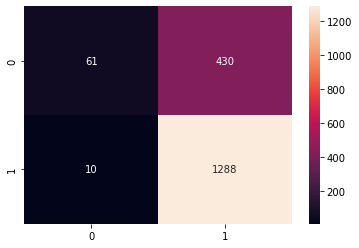

In [41]:
from sklearn.svm import SVC
# svm = SVC(
#     C = 10, # Cfloat, default=1.0
#     kernel = 'sigmoid', #kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
#     degree = 5, #degree, default=3
#     gamma = 0.1, #gamma{‘scale’, ‘auto’} or float, default=’scale’
#     class_weight = None, # ‘balanced’, default=None
#     max_iter = 15,
# #     decision_function_shape = 'ovo' # {‘ovo’, ‘ovr’}, default=’ovr’
# )

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'degree': [0,1,2,3],
              'max_iter': [10,15,20],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, Y_train)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

svm = SVC(C = grid.best_params_['C'],
         gamma = grid.best_params_['gamma'],
         degree = grid.best_params_['degree'],
         max_iter = grid.best_params_['max_iter'],
         kernel = grid.best_params_['kernel']
         )

svm.fit(X_train, Y_train)

pred=svm.predict(X_test)
print(accuracy_score(Y_test, pred)*100)

confusion_matrix_svm = pd.DataFrame(confusion_matrix(Y_test, pred))
sns.heatmap(confusion_matrix_svm, annot=True, fmt='g')
print(classification_report(Y_test, pred))


print('Accuracy ofsvm on training set: {:.2f}'
     .format(svm.score(X_train, Y_train)))
print('Accuracy of svm on test set: {:.2f}'
     .format(svm.score(X_test, Y_test)))